# Network creationg - SNet, SNetF, SNetT, UserNet


## Importing data

In [5]:
# !pip install pandas
import pandas as pd

# !pip install pickle
import pickle

# !pip install networkx
import networkx as nx

In [6]:
with open("data/comments_cleaned", 'rb') as file:
    comments = pickle.load(file)
    
with open("data/submissions_cleaned", 'rb') as file:
    submissions = pickle.load(file)

In [7]:
submissions

,submissions_id,url,permalink,author,created_utc,subreddit,subreddit_id,num_comments,score,over_18
0,648oo,http://www.ignorancedenied.com/viewthread.php?...,/r/reddit.com/comments/648oo/brain_disease_is_...,DITUS,1199145615,reddit.com,t5_6,1,0,False
1,648op,http://www.flascience.org/wp/?p=363,/r/science/comments/648op/three_more_florida_c...,rmuser,1199145634,science,t5_mouw,5,20,False
2,648or,http://hosted.ap.org/dynamic/stories/O/ODD_SHO...,/r/reddit.com/comments/648or/nude_couple_grapp...,zorno,1199145709,reddit.com,t5_6,1,3,False
3,648os,http://www.sltrib.com/opinion/ci_7846101?sourc...,/r/politics/comments/648os/apparently_bushs_pr...,rmuser,1199145735,politics,t5_2cneq,2,0,False
4,648ot,http://hosted.ap.org/dynamic/stories/O/ODD_RAR...,/r/reddit.com/comments/648ot/diners_find_rare_...,zorno,1199145735,reddit.com,t5_6,0,0,False
...,...,...,...,...,...,...,...,...,...,...
2044805,7mq3n,http://ventaboutsports.blogspot.com/2008/12/so...,/r/funny/comments/7mq3n/some_extremely_corny_j...,themightymidget,1230767909,funny,t5_2qh33,0,1,False
2044806,7mq3o,http://www.pbs.org/mormons/etc/genealogy.html,/r/news/comments/7mq3o/pbs_looks_at_the_massiv...,Tom22,1230767926,news,t5_2qh3l,0,0,False
2044807,7mq3q,http://www.narutogames.biz,/r/reddit.com/comments/7mq3q/naruto_games/,bixiebix,1230767937,reddit.com,t5_6,7,1,False
2044808,7mq3r,http://www.youtube.com/watch?v=gdQH1CI4LHY&amp...,/r/politics/comments/7mq3r/ron_paul_on_recent_...,middkidd,1230767963,politics,t5_2cneq,3,1,False


In [8]:
comments

,comments_id,author,link_id,parent_id,created_utc,subreddit,subreddit_id,score
25,c02s9t4,LiberalDemocrat,648os,648os,1199145817,politics,t5_2cneq,1
55,c02s9u6,DiscoWolf,648os,648os,1199146090,politics,t5_2cneq,1
63,c02s9uh,Flemlord,648p5,648p5,1199146155,politics,t5_2cneq,7
69,c02s9un,LiberalDemocrat,648oy,648oy,1199146229,reddit.com,t5_6,0
72,c02s9us,LiberalDemocrat,648p5,648p5,1199146266,politics,t5_2cneq,-10
...,...,...,...,...,...,...,...,...
4873683,c06vwuc,fergie,7k6cl,7k6cl,1229579665,politics,t5_2cneq,2
4873685,c06vwue,wolfzero,7k4if,c06vs7l,1229579675,technology,t5_2qh16,4
4873686,c06vwug,Morgin_Black,7k3w5,7k3w5,1229579679,comics,t5_2qh0s,0
4873687,c06vwui,onezerozeroone,7k2bc,c06vrvz,1229579685,atheism,t5_2qh2p,1


## Creating networks

### General 

    - Create 3 different networks.
    - Nodes are subreddits.
    - Edges are people who have been active on two.
    - Weights are formed like a**n, where n is number of monthers (1-12) and a is 0..1

### 1. SNet - Subreddit network 

All subreddits and edges formed from comments and submissions.

In [9]:
all_subreddits = pd.concat([submissions[["subreddit"]], comments[["subreddit"]]], ignore_index=True)
all_subreddits.drop_duplicates(subset=['subreddit'], inplace=True, ignore_index=True)
print("Check number of nodes with the value from static analysis")
print("Number of subreddits: ", all_subreddits.shape[0])
%store -r NUMBER_OF_SUBREDDITS 
assert(all_subreddits.shape[0] == NUMBER_OF_SUBREDDITS)


Check number of nodes with the value from static analysis
Number of subreddits:  4191


In [10]:
SNet = nx.Graph()
SNet.add_nodes_from(all_subreddits["subreddit"])
assert(SNet.number_of_nodes() == NUMBER_OF_SUBREDDITS)

In [11]:
submissions_author_to_subreddit = submissions.groupby("author")["subreddit"].apply(set).reset_index(name='subreddits')
submissions_author_to_subreddit

,author,subreddits
0,*polhold00133,{reddit.com}
1,*polhold00149,{science}
2,--------------------,{politics}
3,-----KATHRINE,{reddit.com}
4,--semi--,{reddit.com}
...,...,...
185346,zzzxxc,{reddit.com}
185347,zzzz2008,"{worldnews, funny, politics, WTF}"
185348,zzzz71,{reddit.com}
185349,zzzzzzzzzzz,"{reddit.com, politics}"


In [12]:
comments_author_to_subreddit = comments.groupby("author")["subreddit"].apply(set).reset_index(name='subreddits')
comments_author_to_subreddit

,author,subreddits
0,--------------------,"{programming, reddit.com, politics}"
1,--Aly95--,{it}
2,-Borfo-,"{WTF, politics, entertainment, technology, wor..."
3,-Chewbacca-,{reddit.com}
4,-J-,"{comics, environment, programming, Health, his..."
...,...,...
79718,zzz1357,{politics}
79719,zzzSleepyCoder,"{programming, AskReddit}"
79720,zzzaaa,{reddit.com}
79721,zzzeek,"{entertainment, programming, science, reddit.c..."


In [13]:
authors_to_subreddits = pd.concat([submissions, comments])
authors_to_subreddits = authors_to_subreddits[["subreddit", "author"]]
authors_to_subreddits = authors_to_subreddits.groupby("author")["subreddit"].apply(set).reset_index(name='subreddits')
authors_to_subreddits

,author,subreddits
0,*polhold00133,{reddit.com}
1,*polhold00149,{science}
2,--------------------,"{programming, reddit.com, politics}"
3,-----KATHRINE,{reddit.com}
4,--Aly95--,{it}
...,...,...
219367,zzzxxc,{reddit.com}
219368,zzzz2008,"{WTF, politics, worldnews, Economics, reddit.c..."
219369,zzzz71,{reddit.com}
219370,zzzzzzzzzzz,"{reddit.com, politics}"


Filter out Authors with less than two subreddits

In [14]:
authors_to_subreddits = authors_to_subreddits[authors_to_subreddits['subreddits'].apply(lambda x: len(x) >= 2)]
authors_to_subreddits

,author,subreddits
2,--------------------,"{programming, reddit.com, politics}"
7,-Borfo-,"{WTF, politics, entertainment, technology, wor..."
11,-J-,"{comics, environment, programming, Health, his..."
12,-K-,"{Economics, politics, comics}"
15,-Peter-,"{reddit.com, es}"
...,...,...
219356,zzxxqq,"{reddit.com, politics}"
219360,zzzSleepyCoder,"{programming, AskReddit}"
219363,zzzeek,"{entertainment, programming, science, reddit.c..."
219368,zzzz2008,"{WTF, politics, worldnews, Economics, reddit.c..."


In [15]:
print("Check if \"--Aly95--\" is not in the DF (submissions) : ", authors_to_subreddits[authors_to_subreddits["author"] == "--Aly95--"].empty)
print("Check if \"*polhold00133\" is not in the DF (comments) : ", authors_to_subreddits[authors_to_subreddits["author"] == "*polhold00133"].empty)

Check if "--Aly95--" is not in the DF (submissions) :  True
Check if "*polhold00133" is not in the DF (comments) :  True


In [16]:
# !pip install itertools
from itertools import combinations

for _, row in authors_to_subreddits.iterrows():
    edges = combinations(row["subreddits"],2)
#     SNet.add_edges_from(list(edges))
    for edge in edges:
        if edge in SNet.edges:
            SNet.edges[edge]["weight"] += 1
        else:
            SNet.add_edge(edge[0], edge[1], weight=1)

In [17]:
SNet.number_of_edges()

135974

In [18]:
isoleted_nodes = list(nx.isolates(SNet))
print(f"There should be no isoleted nodes (?) (\"not connected\") but are there: {len(isoleted_nodes)} ?")

There should be no isoleted nodes (?) ("not connected") but are there: 780 ?


In [19]:
# SNet.remove_nodes_from(isoleted_nodes)

# print(nx.info(SNet))

### 2. SNetF - SNet Filtered

SNet but filters out edges with a weight under *w_threshold* limit.

Need to **visualize** the distribution of edge weights

In [32]:
edge_weights = [SNet.edges[edge]["weight"] for edge in SNet.edges]
edge_map = {x: edge_weights.count(x) for x in edge_weights}
print(len(edge_map.keys()))
print(len(edge_map.values()))

1157
1157


Edge map: {keys = unique weights, values = number of occurences}

So when I sort by keys, I will get the a map where smaller weights first, and bigger ws later

In [87]:
import operator
edge_map = dict(sorted(edge_map.items(), key=operator.itemgetter(0)))
edge_map

{1: 79674,
 2: 17259,
 3: 8167,
 4: 4823,
 5: 3240,
 6: 2336,
 7: 1772,
 8: 1428,
 9: 1189,
 10: 966,
 11: 828,
 12: 766,
 13: 702,
 14: 572,
 15: 576,
 16: 460,
 17: 434,
 18: 384,
 19: 388,
 20: 366,
 21: 277,
 22: 290,
 23: 241,
 24: 238,
 25: 193,
 26: 232,
 27: 206,
 28: 185,
 29: 203,
 30: 173,
 31: 122,
 32: 140,
 33: 153,
 34: 142,
 35: 151,
 36: 131,
 37: 99,
 38: 125,
 39: 130,
 40: 100,
 41: 113,
 42: 96,
 43: 93,
 44: 82,
 45: 85,
 46: 98,
 47: 70,
 48: 91,
 49: 84,
 50: 69,
 51: 83,
 52: 83,
 53: 63,
 54: 69,
 55: 67,
 56: 78,
 57: 63,
 58: 57,
 59: 51,
 60: 59,
 61: 58,
 62: 56,
 63: 50,
 64: 42,
 65: 45,
 66: 55,
 67: 34,
 68: 63,
 69: 38,
 70: 46,
 71: 50,
 72: 35,
 73: 39,
 74: 34,
 75: 27,
 76: 35,
 77: 38,
 78: 26,
 79: 43,
 80: 34,
 81: 34,
 82: 41,
 83: 26,
 84: 29,
 85: 33,
 86: 26,
 87: 35,
 88: 33,
 89: 26,
 90: 32,
 91: 18,
 92: 21,
 93: 24,
 94: 19,
 95: 19,
 96: 25,
 97: 17,
 98: 26,
 99: 19,
 100: 36,
 101: 22,
 102: 28,
 103: 21,
 104: 21,
 105: 17,
 106: 2

In [80]:
edge_map_keys = list(edge_map.keys())
edge_map_values = list(edge_map.values())

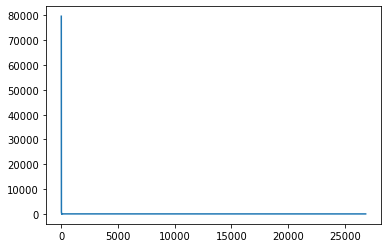

In [106]:
import matplotlib.pyplot as plt

plt.plot(edge_map_keys, edge_map_values)
plt.show()

As we can see, there is a *power-law distribution* going on. Most edges have a weight of either 1 or 2! What about the first 10?

In [107]:
sum_first_ten = sum(edge_map_values[0:11])
print(f"Proof of previously mentioned information: {sum_first_ten} / {SNet.number_of_edges()} = {round(float(sum_first_ten) * 100 / SNet.number_of_edges(), 2)}%")

Proof of previously mentioned information: 121682 / 135974 = 89.49%


Let's test when there are no weights with more occurences than a 100

In [111]:
index_before_nlt100 = 10
for i in range(11, len(edge_map_values)):
    if len(list(filter(lambda x: x >= 100, list(edge_map.values())[i:]))) == 0:
        index_before_nlt100 = i
        break
        
print(f"Index of first sub 100: {index_before_nlt100} and proof: {len(list(filter(lambda x: x >= 100, list(edge_map.values())[index_before_nlt100:])))}")

Index of first sub 100: 41 and proof: 0


In [112]:
sum_first_le100 = sum(edge_map_values[0:index_before_nlt100 + 1])
print(f"Proof of previously mentioned information: {sum_first_le100} / {SNet.number_of_edges()} = {round(float(sum_first_le100) * 100 / SNet.number_of_edges(), 2)}%")

Proof of previously mentioned information: 130070 / 135974 = 95.66%


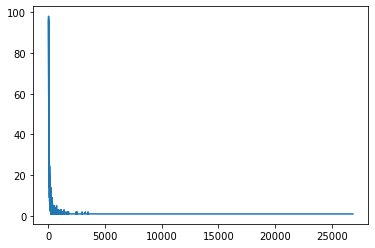

In [113]:
plt.plot(edge_map_keys[index_before_nlt100:], edge_map_values[index_before_nlt100:])
plt.show()

In [117]:
w_threshold = index_before_nlt100

In [120]:
SNetF = SNet.copy(as_view=False) # deep copy

In [121]:
print(nx.info(SNetF))

edges_to_remove = [(a,b) for a, b, attrs in SNetF.edges(data=True) if attrs["weight"] < w_threshold]
SNetF.remove_edges_from(edges_to_remove)

print(nx.info(SNetF))

Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 135974
Average degree:  64.8886
Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 6113
Average degree:   2.9172


The treshold has reduced the SNet graph quite a bit!

### 3. SNetT - SNet Targeted - filter subreddit list

In [122]:
filter = {"reddit.com","pics","worldnews","programming","business","politics","obama","science","technology","WTF","AskReddit","netsec","philosophy","videos","offbeat","funny","entertainment","linux","geek","gaming","comics","gadgets","nsfw","news","environment","atheism","canada","math","Economics","scifi","bestof","cogsci","joel","Health","guns","photography","software","history","ideas"}

In [123]:
SNetT = SNet.copy(as_view=False)

In [124]:
print("Nodes before deletion: ", SNetT.number_of_nodes())
print("Edges before deletion: ", SNetT.number_of_edges())

nodes_to_remove = [node for node in SNetT.nodes() if node not in filter]
SNetT.remove_nodes_from(nodes_to_remove)

print("Nodes after deletion: ", SNetT.number_of_nodes())
print("Edges after deletion: ", SNetT.number_of_edges())
assert(len(filter) == SNetT.number_of_nodes())

Nodes before deletion:  4191
Edges before deletion:  135974
Nodes after deletion:  39
Edges after deletion:  741


### 4. UserNet - models interaction between Authors and Reddit as a platform

What this means is - who commented on whose comment / submission

In [125]:
comments_on_submissions = pd.merge(submissions, comments, left_on="submissions_id", right_on="link_id", how="inner")
comments_on_submissions = comments_on_submissions.groupby(["author_x", "author_y"]).size().reset_index().rename(columns={0: "weight"})
comments_on_submissions = comments_on_submissions[comments_on_submissions["author_x"] != comments_on_submissions["author_y"]]
comments_on_submissions

,author_x,author_y,weight
0,--semi--,ruki02,1
2,-J-,8-Mighty-Arms,1
3,-J-,Antebios,1
4,-J-,Arve,1
5,-J-,Bakrain,1
...,...,...,...
1871443,zzzz2008,opk,1
1871444,zzzz2008,padfoot7,1
1871445,zzzz2008,ruppinwedle,1
1871446,zzzz2008,spuur,1


> Filter out authors which commented on their own

In [126]:
comments_on_comments = pd.merge(comments, comments, left_on="comments_id", right_on="parent_id", how="inner")
comments_on_comments = comments_on_comments.groupby(["author_x", "author_y"]).size().reset_index().rename(columns={0: "weight"})
comments_on_comments = comments_on_comments[comments_on_comments["author_x"] != comments_on_comments["author_y"]]
comments_on_comments

,author_x,author_y,weight
0,--------------------,chollida1,1
2,-Borfo-,BrianBoyko,1
3,-Borfo-,LetsGoHawks,1
4,-Borfo-,MarlonBain,1
5,-Borfo-,almega,1
...,...,...,...
1259643,zzzz2008,ob2,1
1259644,zzzz2008,orblivion,1
1259645,zzzz2008,ryanh29,1
1259646,zzzz2008,the6thReplicant,1


In [127]:
author_to_author = pd.merge(comments_on_submissions, comments_on_comments, left_on=["author_x", "author_y"], right_on=["author_x", "author_y"], how="inner")
author_to_author["weight"] = author_to_author["weight_x"] + author_to_author["weight_y"]
author_to_author = author_to_author.drop(["weight_x", "weight_y"], axis=1)
author_to_author

,author_x,author_y,weight
0,-J-,Eso,2
1,-J-,Whisper,9
2,-J-,aardvarkious,2
3,-J-,berlinbrown,5
4,-J-,codeodor,6
...,...,...,...
102038,zyzzogeton,stats,2
102039,zyzzx0,Javbw,3
102040,zzzSleepyCoder,brtw,2
102041,zzzSleepyCoder,grelphy,3


In [128]:
# UserNet = nx.from_pandas_adjacency(author_to_author, create_using=nx.DiGraph,columns=["author_x", "author_y"])
UserNet = nx.from_pandas_edgelist(author_to_author,source='author_x',target='author_y', edge_attr='weight', create_using=nx.DiGraph())
print("Nodes: ", UserNet.number_of_nodes())
print("Edges: ", UserNet.number_of_edges())

Nodes:  18975
Edges:  102043


## Export GMLs

In [129]:
nx.write_gml(SNet, "data/graphs/snet.gml")
nx.write_gml(SNetF, "data/graphs/snetf.gml")
nx.write_gml(SNetT, "data/graphs/snett.gml")
nx.write_gml(UserNet, "data/graphs/usernet.gml")

In [130]:
test_snet_nodes = SNet.number_of_nodes()
test_snet_edges = SNet.number_of_edges()

test_snetf_nodes = SNetF.number_of_nodes()
test_snetf_edges = SNetF.number_of_edges()

test_snett_nodes = SNetT.number_of_nodes()
test_snett_edges = SNetT.number_of_edges()

test_usernet_nodes = UserNet.number_of_nodes()
test_usernet_edges = UserNet.number_of_edges()

## Import GMLs

In [131]:
SNet = nx.read_gml("data/graphs/snet.gml")
SNetF = nx.read_gml("data/graphs/snetf.gml")
SNetT = nx.read_gml("data/graphs/snett.gml")
UserNet = nx.read_gml("data/graphs/usernet.gml")

In [132]:
assert(SNet.number_of_nodes() == test_snet_nodes)
assert(SNet.number_of_edges() == test_snet_edges)
print("Tests for SNet passed")
assert(SNetF.number_of_nodes() == test_snetf_nodes)
assert(SNetF.number_of_edges() == test_snetf_edges)
print("Tests for SNetF passed")
assert(SNetT.number_of_nodes() == test_snett_nodes)
assert(SNetT.number_of_edges() == test_snett_edges)
print("Tests for SNetT passed")
assert(UserNet.number_of_nodes() == test_usernet_nodes)
assert(UserNet.number_of_edges() == test_usernet_edges)
print("Tests for UserNet passed")

print("All tests passed")

Tests for SNet passed
Tests for SNetF passed
Tests for SNetT passed
Tests for UserNet passed
All tests passed
